# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
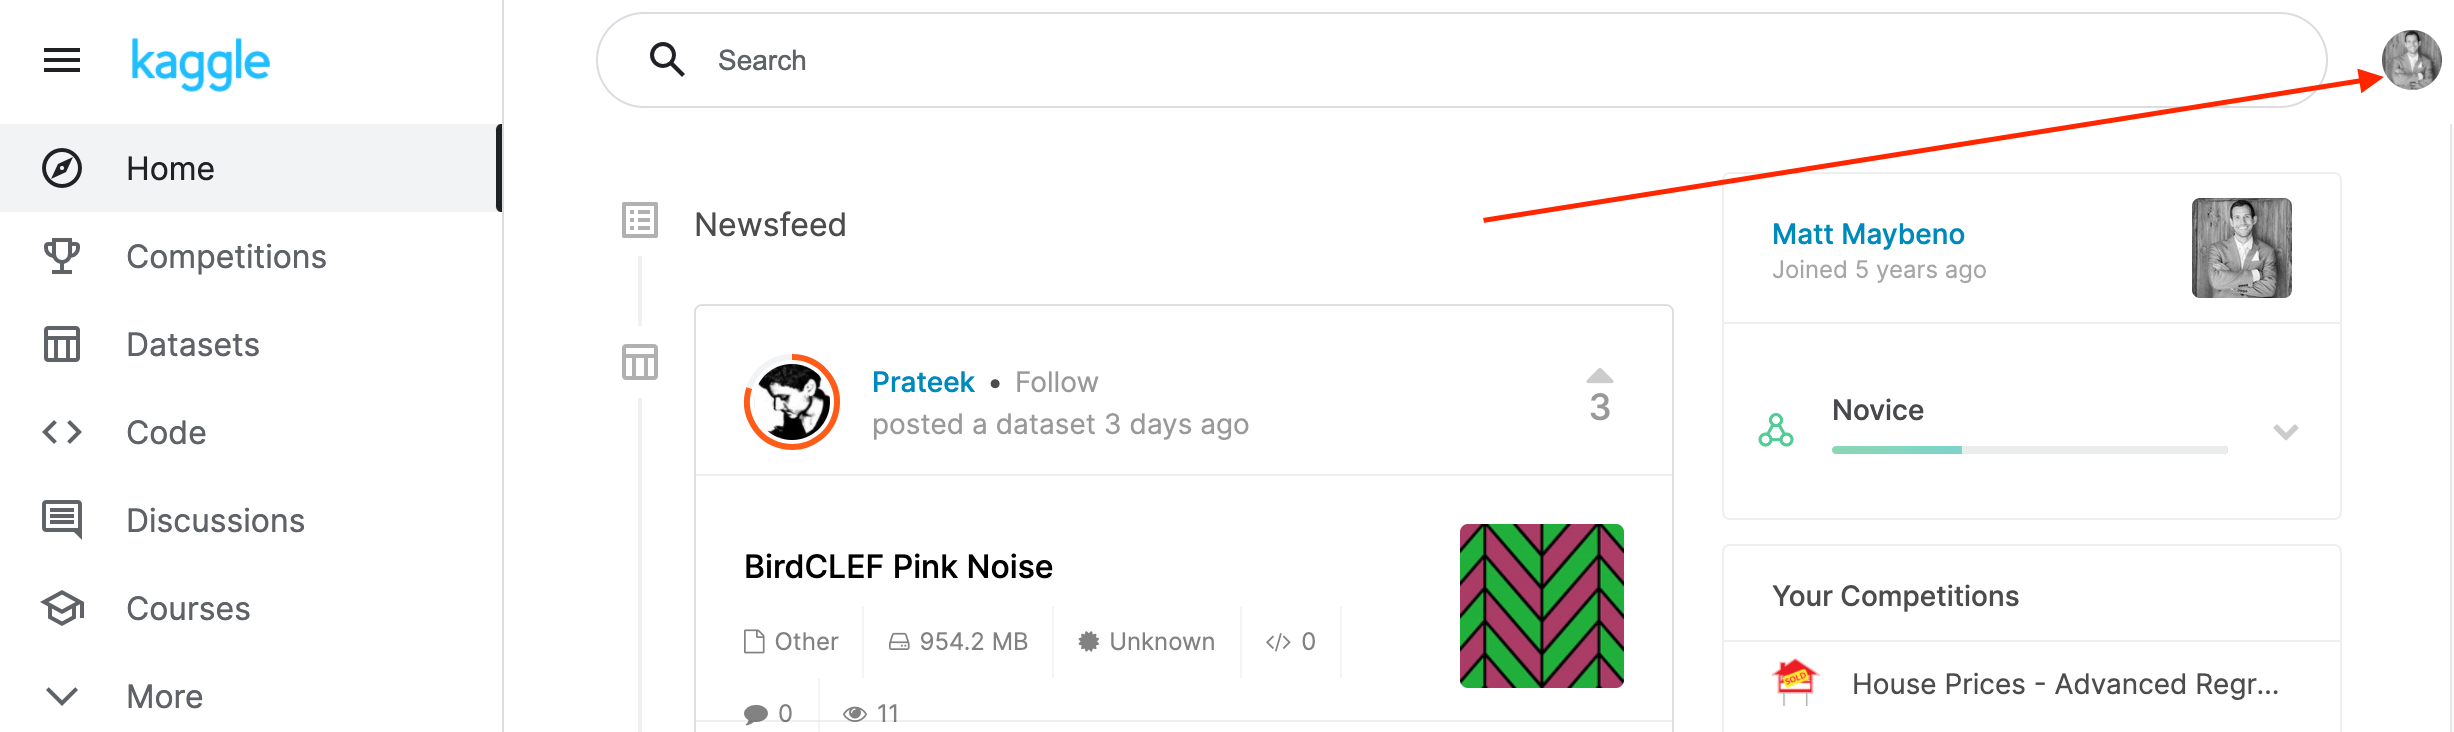
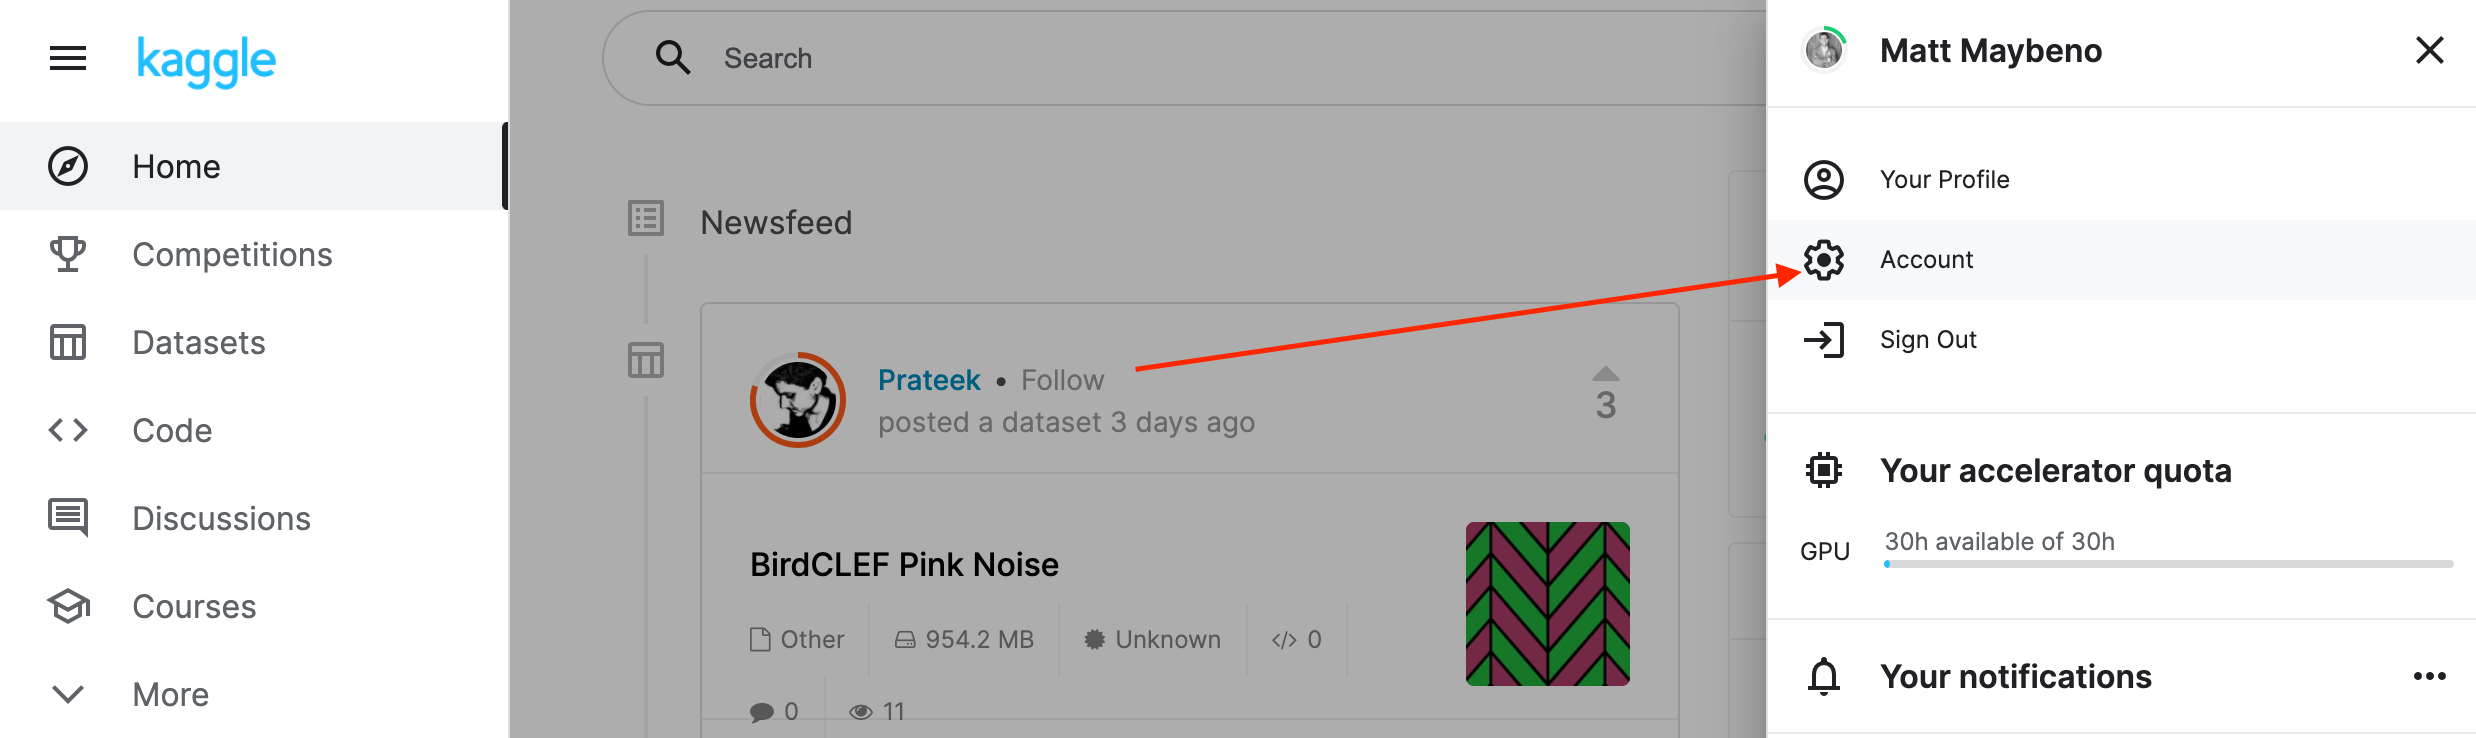
2. Scroll down to API and click Create New API Token.
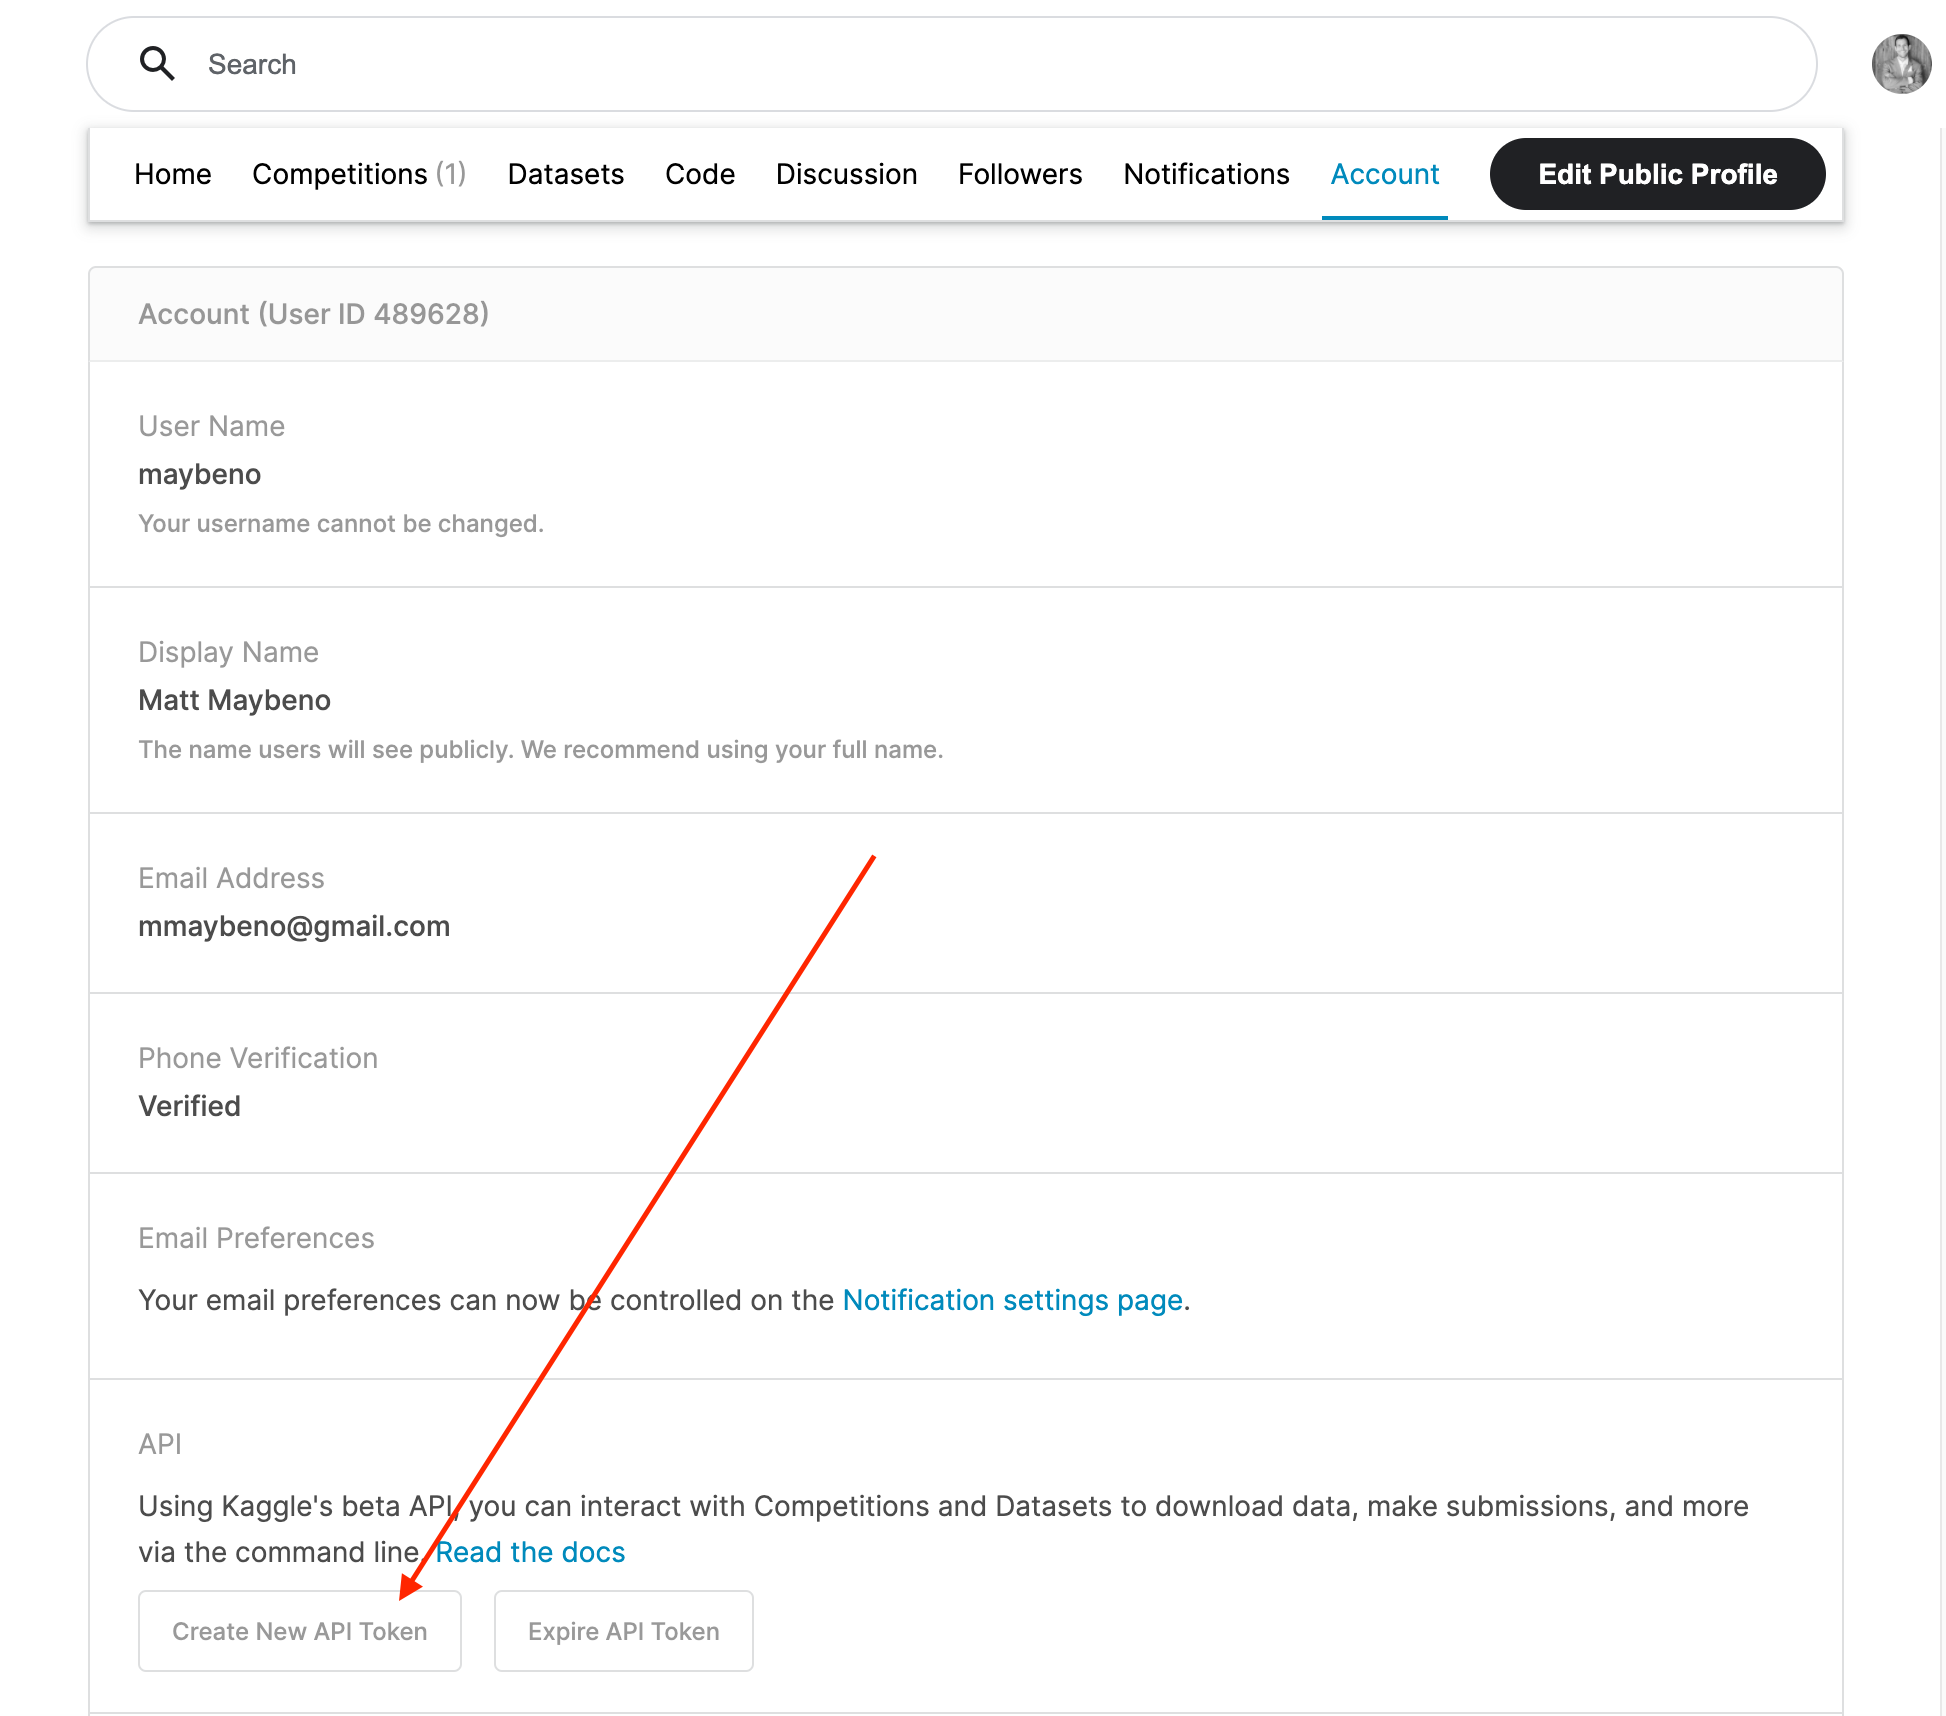
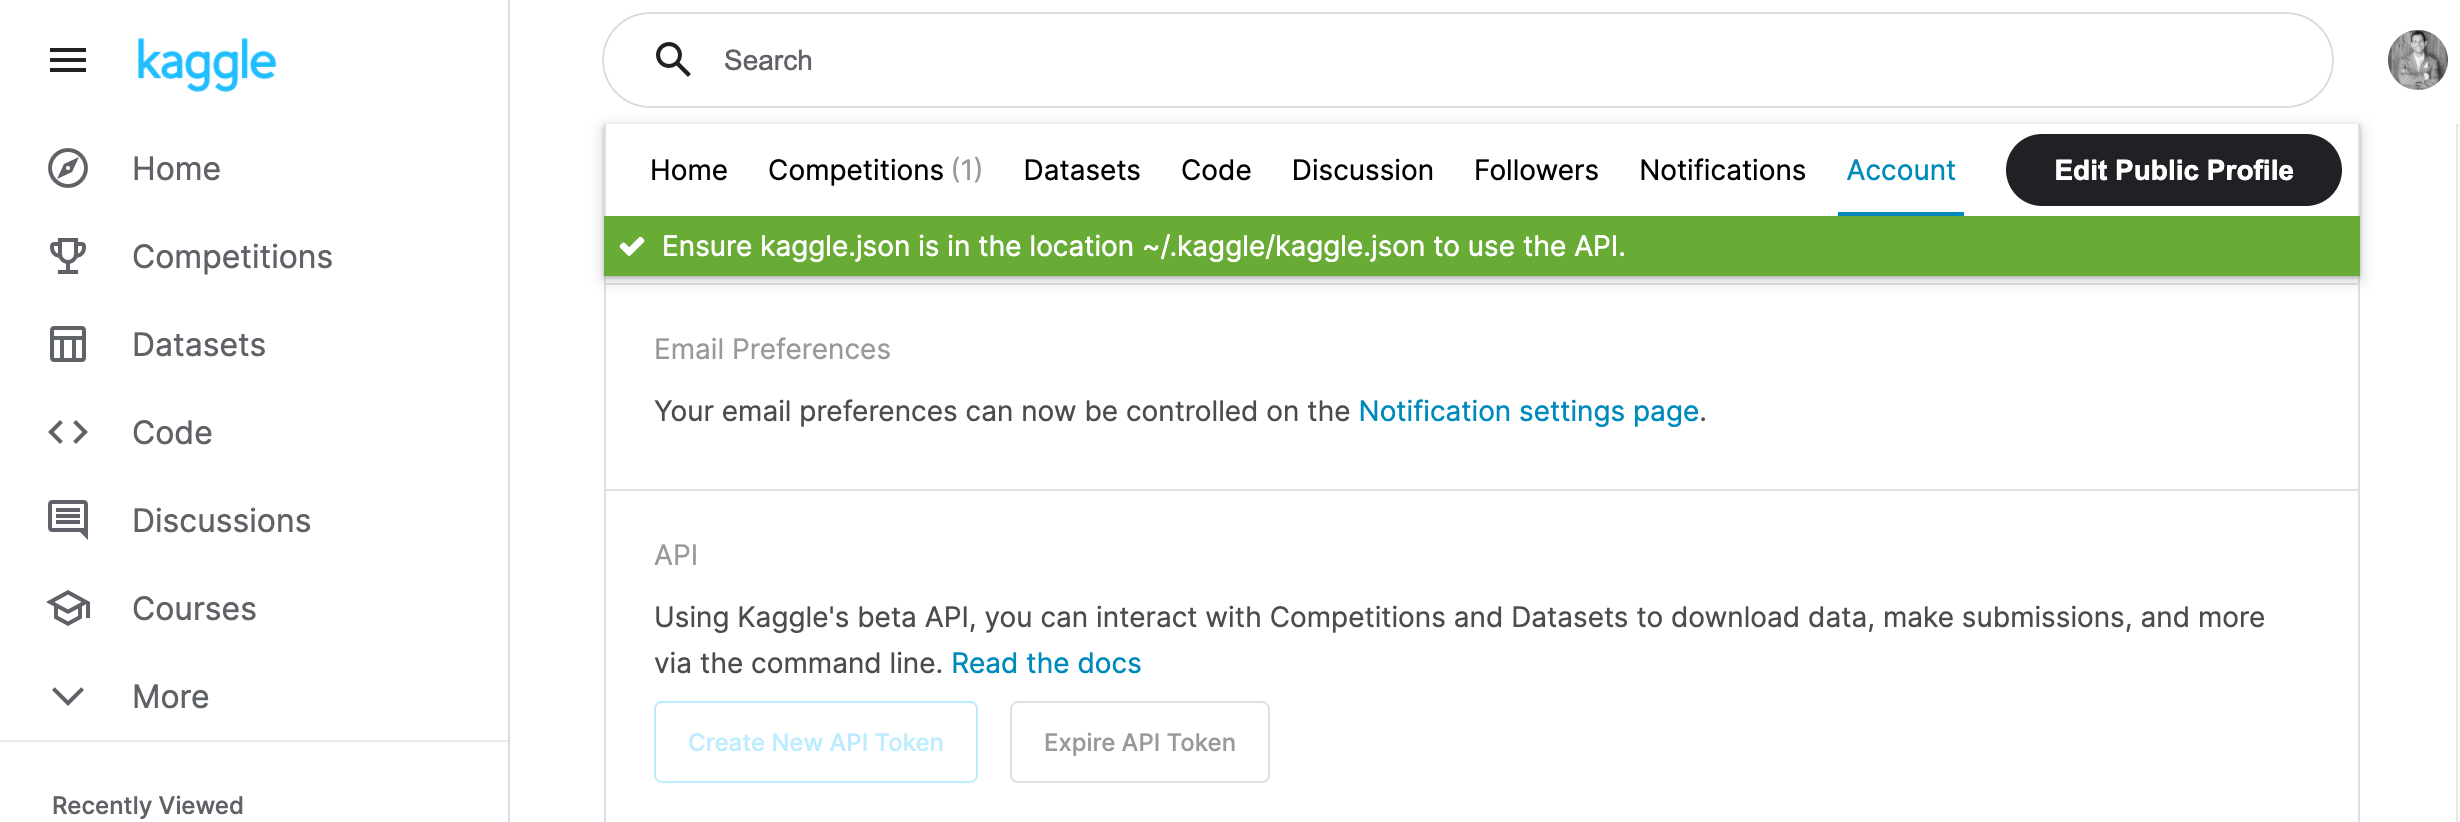
3. Open up `kaggle.json` and use the username and key.
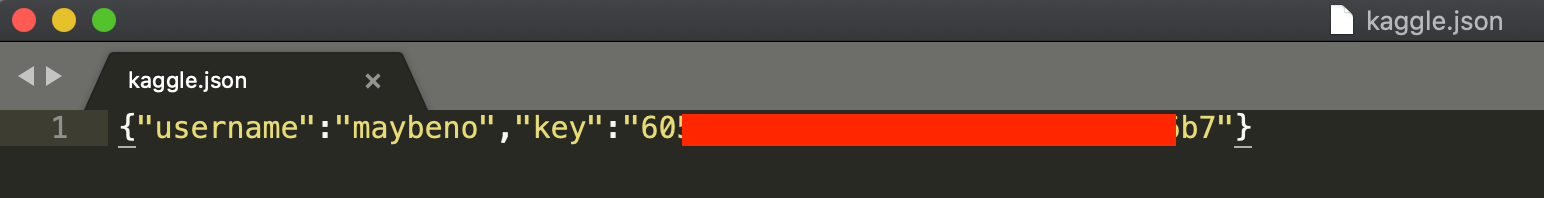

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
!pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
#kaggle_username = "sumeetsinhamba"
#kaggle_key = "f9994b11def1f56ad855ec99bf02fa37"


# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
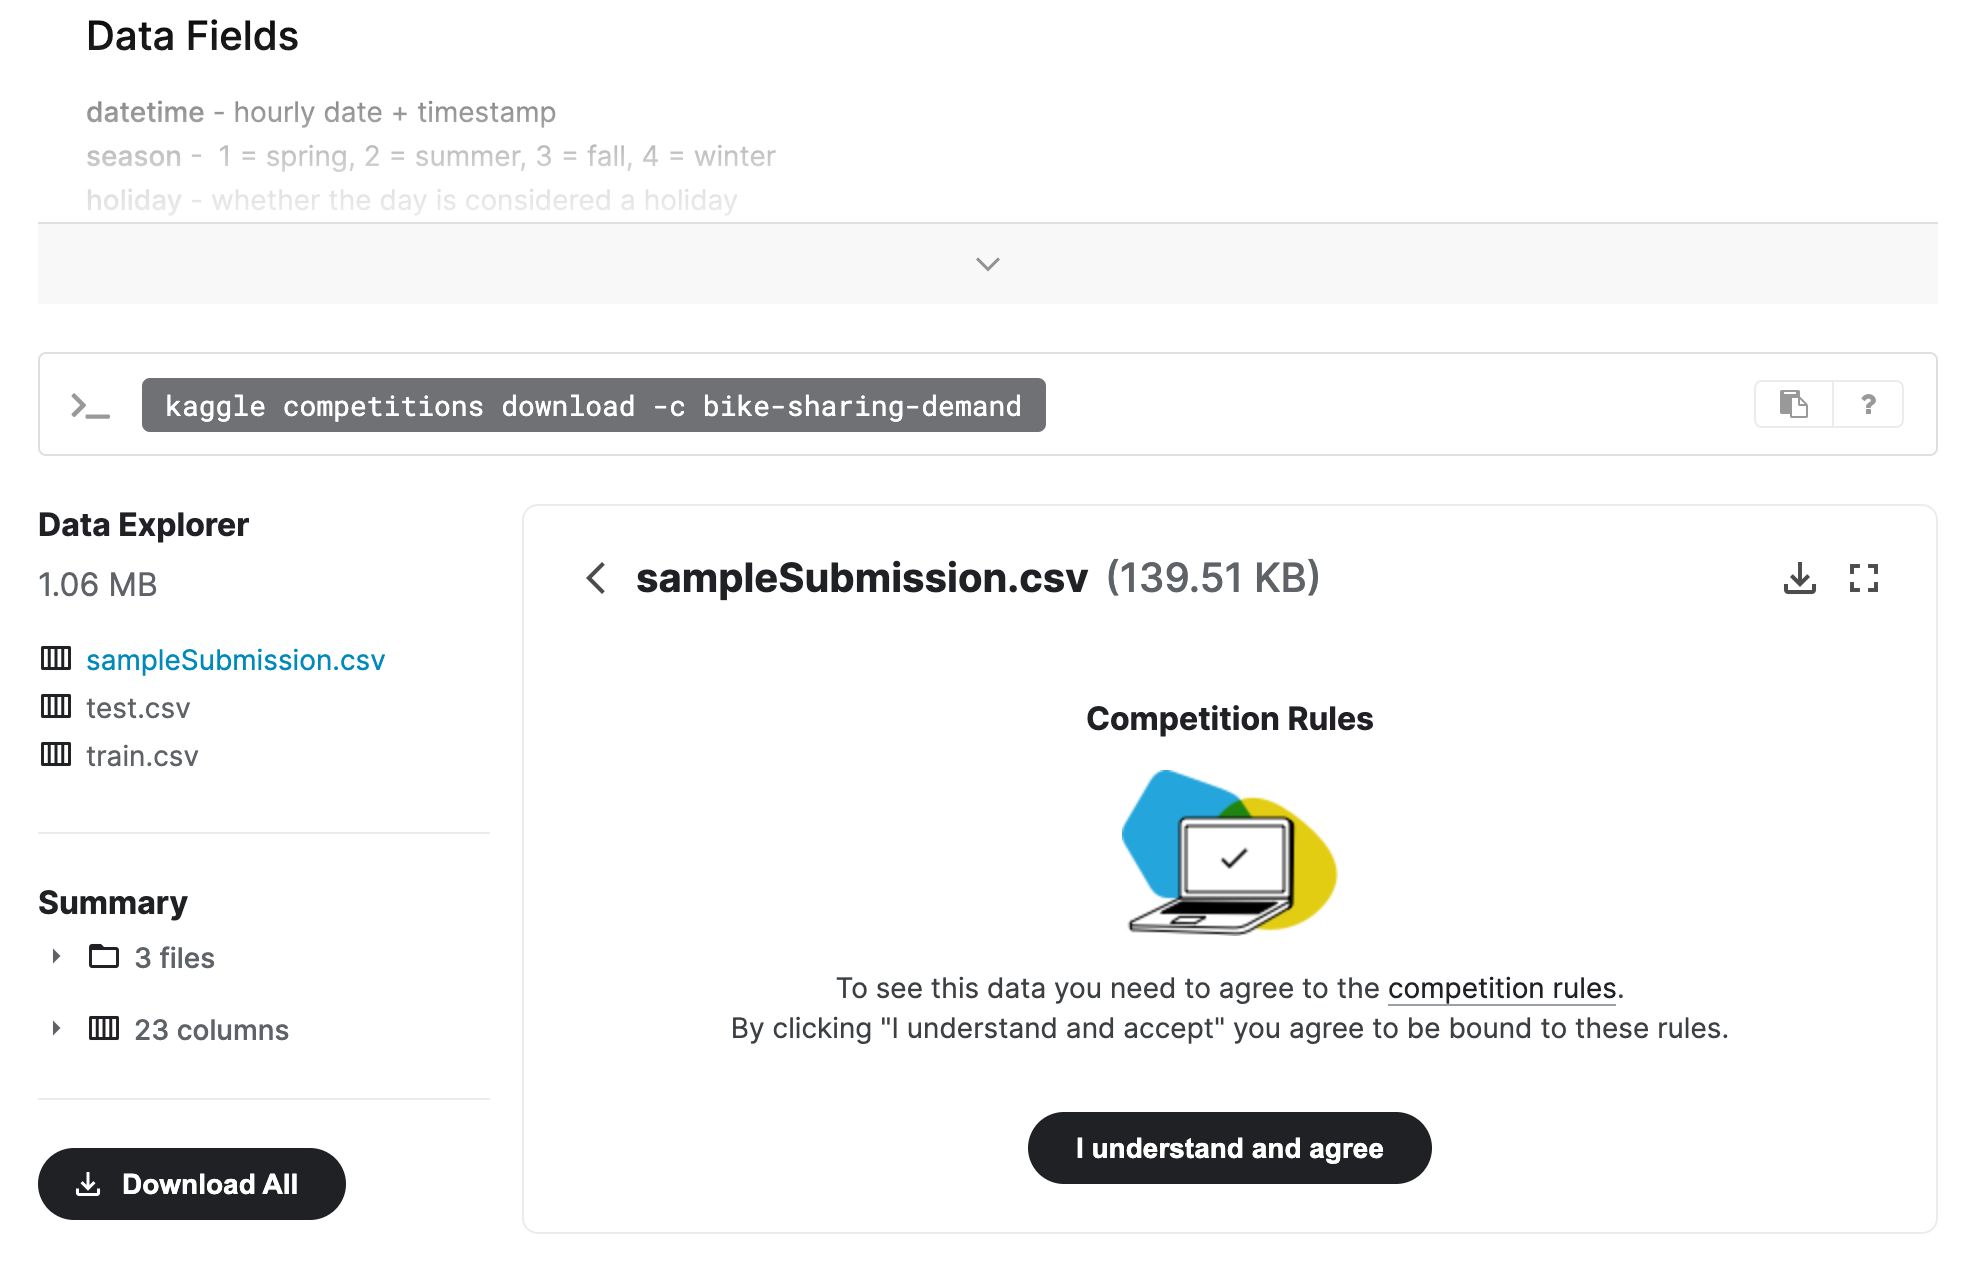

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
pip install ipywidgets

  Using cached ipywidgets-8.0.4-py3-none-any.whl (137 kB)
  Using cached widgetsnbextension-4.0.5-py3-none-any.whl (2.0 MB)
  Using cached jupyterlab_widgets-3.0.5-py3-none-any.whl (384 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()



datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [12]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [13]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [14]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [15]:
isinstance(train, pd.DataFrame)

True

In [34]:
#creating train2 to match the exact columns as in test
train2 = train[['datetime',	'season'	,'holiday'	,'workingday'	,'weather'	,'temp'	,'atemp'	,'humidity'	,'windspeed'	,'count']].copy()

In [39]:
train2.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [38]:
train2.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

In [42]:

"""
Requirements:

We are prediting count, so it is the label we are setting.
Ignore casual and registered columns as they are also not present in the test dataset.
Use the root_mean_squared_error as the metric to use for evaluation.
Set a time limit of 10 minutes (600 seconds).
Use the preset best_quality to focus on creating the best model.
"""

## no need to rerun the lines below, predictor is already saved in path mentioned in cell below
"""

predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train2,
    time_limit=600,
    presets="best_quality")
    
"""


No path specified. Models will be saved in: "AutogluonModels/ag-20230105_094015/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230105_094015/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [45]:
#saved the model predictor in the location specified

predictor = TabularPredictor.load("AutogluonModels/ag-20230105_094015/")

In [46]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.793611      11.659020  507.285051                0.001844           0.450129            3       True         15
1   RandomForestMSE_BAG_L2  -53.273863      10.785690  409.484176                0.588880          26.284038            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.953345      10.784603  391.102922                0.587793           7.902784            2       True         14
3          LightGBM_BAG_L2  -55.132045      10.421407  405.089172                0.224597          21.889035            2       True         11
4          CatBoost_BAG_L2  -55.587237      10.255906  450.759065                0.059096          67.558927            2       True         13
5        LightGBMXT_BAG_L2  -60.414407      14.180013  434.659931         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

<AxesSubplot:xlabel='model'>

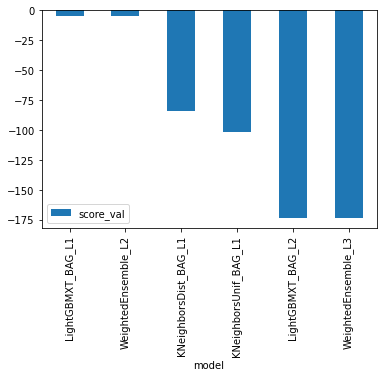

In [20]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [47]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed count  
0        56    26.0027        
1        56     0.0000        
2        56     0.0000        
3        56    11.0014        
4        56    11.0014

In [49]:
train2.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [50]:
predictions = predictor.predict(test,as_pandas=True)
predictions.head()

0    22.725704
1    40.844479
2    44.970406
3    48.566887
4    51.510323
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [53]:
train2.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

In [52]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [51]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.852486
std        90.374519
min         3.075983
25%        20.964937
50%        62.874878
75%       169.450134
max       366.075195
Name: count, dtype: float64

In [54]:
# How many negative values do we have?
(predictions < 0).sum().sum()


0

In [59]:
# Set them to zero
predictions[predictions < 0] = 0



### Set predictions to submission dataframe, save, and submit

In [61]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 362kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-01-05 10:15:07  first raw submission  complete  1.80426      1.80426       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

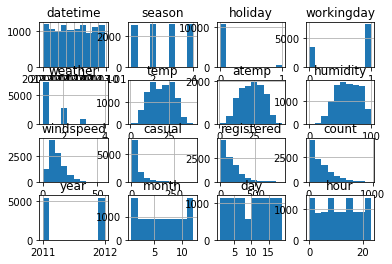

In [164]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [77]:
from datetime import datetime

In [78]:
#changing the column type of "datetime" to datetime
train2.loc[:, "datetime"] = pd.to_datetime(train2.loc[:, "datetime"])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

In [79]:
# create a new feature
# a great suggestion would be to separate out the datetime into hour, day, or month parts.

# new columns for train2 below

train2["year"] = train2.datetime.dt.year
train2["month"] = train2.datetime.dt.month
train2["day"] = train2.datetime.dt.day
train2["hour"] = train2.datetime.dt.hour



# new columns for test below

test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour


In [80]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   count       6493 non-null   object        
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9), object(1)
memory usage: 710.3+ KB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [82]:
#categoricals for train2
train2["season"] = train2["season"].astype("category")
train2["weather"] = train2["weather"].astype("category")

#categoricals for test
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [84]:
#check if categoricals are created for train2
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(8)
memory usage: 1.0 MB


In [85]:
#check if categoricals are created for test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   count       6493 non-null   object        
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 621.9+ KB


In [86]:
# View are new feature
train2.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  year  month  day  hour  
0        81        0.0     16  2011      1    1     0  
1        80        0.0     40  2011      1    1     1  
2        80        0.0     32  2011      1    1     2  
3        75        0.0     13  2011      1    1     3  
4        75        0.0      1  2011      1    1     4

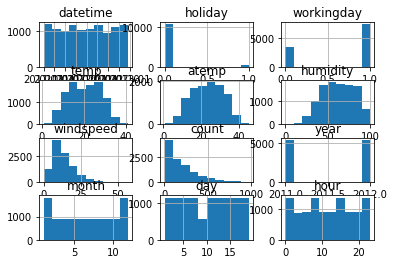

In [165]:
# View histogram of all features again now with the hour feature
train2.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [90]:
#No need to run the cell again, the predictor_new_features model has been saved as shown in cell below

"""
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train2,
    time_limit=600,
    presets="best_quality")
"""


No path specified. Models will be saved in: "AutogluonModels/ag-20230105_105704/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230105_105704/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [91]:
predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20230105_105704/")

In [92]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.039108      14.653740  527.741863                0.000679           0.297809            3       True         15
1          LightGBM_BAG_L2  -30.317990      13.615005  417.930901                0.254935          21.778067            2       True         11
2          CatBoost_BAG_L2  -30.365057      13.466693  479.971908                0.106622          83.819073            2       True         13
3        LightGBMXT_BAG_L2  -31.132036      14.291503  421.846914                0.931433          25.694080            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.391269      13.957012  405.470601                0.596941           9.317767            2       True         14
5   RandomForestMSE_BAG_L2  -31.541630      13.975255  427.380421         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -3

<AxesSubplot:xlabel='model'>

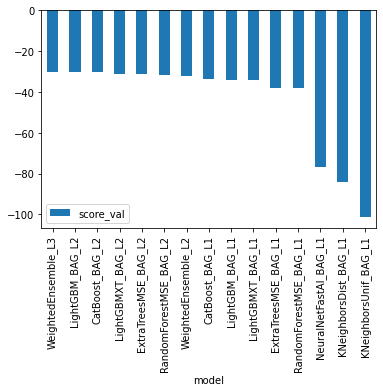

In [94]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [98]:
#let's take a look at the new predictions

predictions_new = predictor_new_features.predict(test,as_pandas=True)
predictions_new.head()

0    15.912199
1    11.921076
2    11.084879
3     9.747220
4     8.536346
Name: count, dtype: float32

In [99]:
# checking for negative values in predictions_new

(predictions_new < 0).sum().sum()

0

In [101]:
# Remember to set all negative values to zero

# doing this step to be on safe side

predictions_new[predictions_new < 0] = 0


In [103]:
#defining submission_new_features

submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [104]:
# Same submitting predictions

submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [105]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 339kB/s]
Successfully submitted to Bike Sharing Demand

In [106]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-05 11:22:44  new features          complete  0.68362      0.68362       
submission.csv               2023-01-05 10:15:07  first raw submission  complete  1.80426      1.80426       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [162]:
#hpo with preset "optimize_for_deployment"

predictor_new_hpo2 = TabularPredictor(label="count", 
                                        eval_metric="root_mean_squared_error",
                                        verbosity=2
                                     
                                    ).fit(train_data=train2,
                                              time_limit=900,
                                              presets="optimize_for_deployment",
                                              auto_stack=True,
                                              num_bag_folds=5,
                                              num_bag_sets=1,
                                              num_stack_levels=1,
                                              hyperparameters="default",
                                              hyperparameter_tune_kwargs="random",
                                              refit_full="best"                                    
                                         )


No path specified. Models will be saved in: "AutogluonModels/ag-20230105_181145/"
Presets specified: ['optimize_for_deployment']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20230105_181145/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression']

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-162-35d59d619ef5>", line 3, in <module>
    predictor_new_hpo2 = TabularPredictor(label="count",
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/utils/decorators.py", line 30, in _call
    return f(*gargs, **gkwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/predictor/predictor.py", line 860, in fit
    self._learner.fit(X=train_data, X_val=tuning_data, X_unlabeled=unlabeled_data,
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/learner/abstract_learner.py", line 125, in fit
    return self._fit(X=X, X_val=X_val, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/learner/default_learner.py", line 118, in _fit
    trainer.fit(
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/trainer

TypeError: object of type 'NoneType' has no len()

In [140]:
#hpo with preset "best_quality"

predictor_new_hpo_q = TabularPredictor(label="count", 
                                        eval_metric="root_mean_squared_error",
                                        verbosity=2
                                     
                                    ).fit(train_data=train2,
                                              time_limit=600,
                                              presets="best_quality",
                                              auto_stack=True,
                                              num_bag_folds=7,
                                              num_bag_sets=3,
                                              num_stack_levels=2                                              
                                         )


No path specified. Models will be saved in: "AutogluonModels/ag-20230105_145609/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=7, num_bag_sets=3
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230105_145609/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [160]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.344278       2.289170  360.891011                0.000810           0.402860            3       True         14
1       LightGBM_BAG_L2/T1  -30.648939       2.288004  265.496807                0.000117          26.209335            2       True         11
2        XGBoost_BAG_L2/T1  -31.035520       2.287999  270.442551                0.000112          31.155079            2       True         13
3     LightGBMXT_BAG_L2/T1  -31.038273       2.288040  269.118766                0.000152          29.831294            2       True         10
4       CatBoost_BAG_L2/T1  -31.347610       2.287979  273.292443                0.000092          34.004971            2       True         12
5     LightGBMLarge_BAG_L1  -33.632590       2.286756   44.131548         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1/T1': -34.56074314057766,
  'LightGBM_BAG_L1/T1': -33.91955460016736,
  'RandomForestMSE_B

In [143]:
predictor_new_hpo_q.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.069068      16.884110  433.598657                0.000996           0.361459            3       True         16
1          LightGBM_BAG_L2  -30.384779      15.529657  286.393376                0.275437          20.114385            2       True         11
2          CatBoost_BAG_L2  -30.425014      15.351875  356.120584                0.097655          89.841593            2       True         13
3      WeightedEnsemble_L4  -30.574843      18.888876  537.269977                0.000784           0.245334            4       True         21
4          CatBoost_BAG_L3  -30.747222      18.169444  492.377641                0.076591          19.999885            3       True         20
5          LightGBM_BAG_L3  -30.937338      18.203691  489.763233         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForest

In [149]:
# Let's take a look at the predictions

predictions_new_hpo1 = predictor_new_hpo1.predict(test,as_pandas=True)
predictions_new_hpo1.head()

0    16.761471
1    11.090453
2    10.268106
3    10.708951
4    10.623063
Name: count, dtype: float32

In [127]:
# Let's take a look at the predictions Q

predictions_new_hpo_q = predictor_new_hpo_q.predict(test,as_pandas=True)
predictions_new_hpo_q.head()

0    16.757214
1    10.819713
2    10.124802
3    10.388745
4    10.393580
Name: count, dtype: float32

In [150]:
# Checking for negative numbers in predictions_new_hpo

(predictions_new_hpo1 < 0).sum().sum()

7

In [128]:
# Checking for negative numbers in predictions_new_hpo_q

(predictions_new_hpo_q < 0).sum().sum()

5

In [151]:
# Remember to set all negative values to zero


predictions_new_hpo1[predictions_new_hpo1 < 0] = 0

In [129]:
# Remember to set all negative values to zero


predictions_new_hpo_q[predictions_new_hpo_q < 0] = 0

In [152]:
# Re-Checking for negative numbers in predictions_new_hpo

(predictions_new_hpo1 < 0).sum().sum()

0

In [130]:
# Re-Checking for negative numbers in predictions_new_hpo_q

(predictions_new_hpo_q < 0).sum().sum()

0

In [153]:
#defining submission_new_hpo

submission_new_hpo1 = pd.read_csv("sampleSubmission.csv")
submission_new_hpo1.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [131]:
#defining submission_new_hpo_q

submission_new_hpo_q = pd.read_csv("sampleSubmission.csv")
submission_new_hpo_q.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [154]:
# Same submitting predictions

submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [132]:
# Same submitting predictions

submission_new_hpo_q["count"] = predictions_new_hpo_q
submission_new_hpo_q.to_csv("submission_new_hpo_q.csv", index=False)

In [155]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters HPO1"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 372kB/s]
Successfully submitted to Bike Sharing Demand

In [133]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_q.csv -m "new features with hyperparameters Best Quality"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 309kB/s]
Successfully submitted to Bike Sharing Demand

In [156]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                     status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-05 15:52:31  new features with hyperparameters HPO1          complete  0.76247      0.76247       
submission_new_hpo_q.csv     2023-01-05 13:30:13  new features with hyperparameters Best Quality  complete  0.73676      0.73676       
submission_new_hpo.csv       2023-01-05 13:00:59  new features with hyperparameters               complete  0.76247      0.76247       
submission_new_features.csv  2023-01-05 11:22:44  new features                                    complete  0.68362      0.68362       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

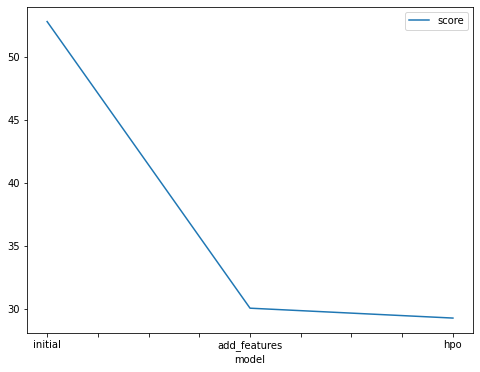

In [144]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [52.79, 30.03, 29.245]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.804, 0.683, 0.762]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time_limit": [600, 600, 1200],
    "num_bag_folds": [0, 0, 7],
    "num_bag_sets": [0, 0, 3],
    "score": [1.804, 0.683, 0.762]
})